# Adidas US Sales Datasets

A dataset pertaining to Adidas sales comprises a compilation of information concerning the sales activities of Adidas products. Such datasets typically encompass details like the quantity of products sold, the total revenue generated from sales, the geographical distribution of sales, the specific product types sold, and other pertinent particulars.

The utilization of Adidas sales data can serve diverse objectives, including the analysis of sales patterns, the identification of successful products or marketing endeavors, and the formulation of strategies for future sales endeavors. Additionally, it can facilitate comparisons between Adidas sales and those of competitors, as well as evaluations of the efficacy of various marketing or sales channels.

Numerous potential sources exist from which an Adidas sales dataset could be obtained, including Adidas itself, market research companies, governmental bodies, or other entities involved in the tracking of sales data. The specific data elements encompassed within an Adidas sales dataset might vary based on the originating source and the intended utilization of the data.

Data Description¶
- Retailer: The company or group that sells Adidas goods.
-Retailer ID: a unique number that each merchant is given.
- Invoice Date: The date when the sales transaction occurred.
- Region: The store's operational geographic territory.
- State: The state within the region where the retailer is located.
- City: The retailer's location in the city.
- Product: The item for sale is an Adidas product.
- Price per Unit: The price of a single Adidas product unit.
- Units Sold: The amount of Adidas merchandise sold in a certain transaction, expressed in units.
- Total Sales: The amount of money made from the sale of Adidas goods in a certain transaction.
- Operating Profit: The amount of money made from the sale of Adidas goods in a certain transaction.
- Operating Margin: The proportion of operational profit to overall sales.
- Sales Method: The process used to carry out the sales transaction.

<a id="cont"></a>

## Table of Contents

- [1. Import Packages](#one)
- [2. Load Data](#two)
- [3. Data Cleaning](#three)
- [4. Data Visualisation](#four)

<a id="one"></a>
# 1. Import Packages
[Back to Table of Contents](#cont)

---

In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

<a id="two"></a>
# 2. Load Data
[Back to Table of Contents](#cont)

---

Convert Excel sheet into a CSV file

In [29]:
excel_file = 'Adidas US Sales Datasets.xlsx' 

column_names = ["Retailer", "Retailer ID","Invoice Date","Region", "State","City", "Product", "Price per Unit",	"Units Sold", "Total Sales", "Operating Profit","Operating Margin","Sales Method"]
df = pd.read_excel(excel_file, header=None, names=column_names)

df = df.dropna(how='all')

csv_file = 'adidas_us_sales.csv'  
df.to_csv(csv_file, index=False)  

In [30]:
adidas_sales_df = pd.read_csv("adidas_us_sales.csv")

In [31]:
adidas_sales_df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
2,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
3,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
4,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store


In [32]:
adidas_sales_df.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9645,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0000000000001,0.28,Outlet
9646,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6000000000001,0.32,Outlet
9647,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37000000000000005,Outlet
9648,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8000000000002,0.42000000000000004,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Women's Street Footwear,29,83,2407,649.89,0.27,Outlet


In [33]:
adidas_sales_df.shape

(9650, 13)

In [34]:
adidas_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9650 entries, 0 to 9649
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9649 non-null   object
 1   Retailer ID       9650 non-null   object
 2   Invoice Date      9649 non-null   object
 3   Region            9649 non-null   object
 4   State             9649 non-null   object
 5   City              9649 non-null   object
 6   Product           9649 non-null   object
 7   Price per Unit    9649 non-null   object
 8   Units Sold        9649 non-null   object
 9   Total Sales       9649 non-null   object
 10  Operating Profit  9649 non-null   object
 11  Operating Margin  9649 non-null   object
 12  Sales Method      9649 non-null   object
dtypes: object(13)
memory usage: 980.2+ KB


In [35]:
adidas_sales_df.describe()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9649,9650,9649,9649,9649,9649,9649,9649,9649,9649,9649,9649,9649
unique,7,6,725,6,51,53,7,147,362,3513,6511,128,4
top,Foot Locker,1185732,2021-01-17 00:00:00,West,Texas,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557,207,52,34,1229,4889


<a id="three"></a>
# 3. Data Cleaning
[Back to Table of Contents](#cont)

---

In [36]:
adidas_sales_df.isnull().sum()

Retailer            1
Retailer ID         0
Invoice Date        1
Region              1
State               1
City                1
Product             1
Price per Unit      1
Units Sold          1
Total Sales         1
Operating Profit    1
Operating Margin    1
Sales Method        1
dtype: int64

In [37]:
null_values = adidas_sales_df[adidas_sales_df['Retailer'].isnull()]

In [38]:
null_values

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df_cleaned = adidas_sales_df.dropna()

In [40]:
df_cleaned.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [41]:
df_cleaned = df_cleaned.drop(1)

In [42]:
df_cleaned

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
2,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
3,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
4,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
5,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
6,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0000000000001,0.28,Outlet
9646,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6000000000001,0.32,Outlet
9647,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37000000000000005,Outlet
9648,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8000000000002,0.42000000000000004,Outlet


<a id="four"></a>
# 4. Data Visualisation
[Back to Table of Contents](#cont)

---

In [44]:
# Drop Invoice Data Column
df_cleaned.drop("Invoice Date", axis=1, inplace=True)

In [45]:
df_cleaned.head()

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
2,Foot Locker,1185732,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
3,Foot Locker,1185732,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
4,Foot Locker,1185732,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
5,Foot Locker,1185732,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
6,Foot Locker,1185732,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


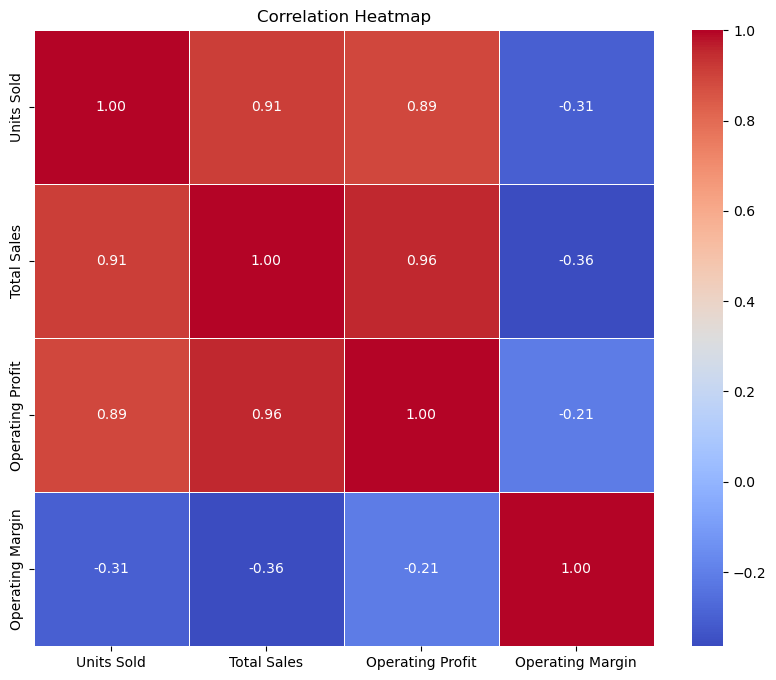

In [47]:
correlation_heatmap = df_cleaned[['Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

- High correlation between the number of Units Sold & Operating Profit
- High correlation between the number of Total Sales & Operating Profit
- High correlation between the number of Units Sold and Total Sales

Top Selling Retailer

Top Selling Product Category

State with the most Sales

Retailer with the Most Operating Profit

Most Popular Product amongst all Retailers